In [1]:
# Import Pandas as Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# Import dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Extraction, Transformation, Loading (ETL)

## Post Covid Dataframe

In [2]:
# Read the post covid file and store into Pandas DataFrame
post_covid_df = pd.read_csv("Resources/Post-COVID_Conditions.csv")
post_covid_df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile range,Quartile number,Suppression Flag
0,"Ever experienced long COVID, as a percentage o...",National Estimate,United States,United States,3.5,46,"Jun 1 - Jun 13, 2022",6/1/2022,6/13/2022,14.0,13.5,14.5,13.5 - 14.5,NaN,NaN,NaN
1,"Ever experienced long COVID, as a percentage o...",By Age,United States,18 - 29 years,3.5,46,"Jun 1 - Jun 13, 2022",6/1/2022,6/13/2022,17.8,15.9,19.8,15.9 - 19.8,NaN,NaN,NaN
2,"Ever experienced long COVID, as a percentage o...",By Age,United States,30 - 39 years,3.5,46,"Jun 1 - Jun 13, 2022",6/1/2022,6/13/2022,15.2,14.1,16.2,14.1 - 16.2,NaN,NaN,NaN
3,"Ever experienced long COVID, as a percentage o...",By Age,United States,40 - 49 years,3.5,46,"Jun 1 - Jun 13, 2022",6/1/2022,6/13/2022,16.9,15.7,18.3,15.7 - 18.3,NaN,NaN,NaN
4,"Ever experienced long COVID, as a percentage o...",By Age,United States,50 - 59 years,3.5,46,"Jun 1 - Jun 13, 2022",6/1/2022,6/13/2022,15.3,14.1,16.7,14.1 - 16.7,NaN,NaN,NaN


In [3]:
post_covid_df["Time Period End Date"]= pd.to_datetime(post_covid_df["Time Period End Date"])
post_covid_df["Time Period End Date"].max()

Timestamp('2023-01-16 00:00:00')

In [4]:
# Filter df by "By State" and the most recent date "2/15/2023"
post_covid_df = post_covid_df.loc[(post_covid_df["Group"] == "By State") & (post_covid_df["Time Period End Date"] == "2023-01-16 00:00:00")]
post_covid_df.head()


,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile range,Quartile number,Suppression Flag
4383,"Ever experienced long COVID, as a percentage o...",By State,Alabama,Alabama,3.7,53,"Jan 4 - Jan 16, 2023",1/4/2023,2023-01-16,18.1,14.9,21.6,14.9 - 21.6,16.7-21.6,4.0,NaN
4384,"Ever experienced long COVID, as a percentage o...",By State,Alaska,Alaska,3.7,53,"Jan 4 - Jan 16, 2023",1/4/2023,2023-01-16,16.5,13.3,20.3,13.3 - 20.3,15.3-16.6,3.0,NaN
4385,"Ever experienced long COVID, as a percentage o...",By State,Arizona,Arizona,3.7,53,"Jan 4 - Jan 16, 2023",1/4/2023,2023-01-16,16.5,14.0,19.3,14.0 - 19.3,15.3-16.6,3.0,NaN
4386,"Ever experienced long COVID, as a percentage o...",By State,Arkansas,Arkansas,3.7,53,"Jan 4 - Jan 16, 2023",1/4/2023,2023-01-16,21.6,18.0,25.5,18.0 - 25.5,16.7-21.6,4.0,NaN
4387,"Ever experienced long COVID, as a percentage o...",By State,California,California,3.7,53,"Jan 4 - Jan 16, 2023",1/4/2023,2023-01-16,15.8,13.9,17.8,13.9 - 17.8,15.3-16.6,3.0,NaN


In [5]:
# Create the dataframe with desired columns
post_covid_df = post_covid_df[["Indicator", "State", "Value"]]
post_covid_df.head()

,Indicator,State,Value
4383,"Ever experienced long COVID, as a percentage o...",Alabama,18.1
4384,"Ever experienced long COVID, as a percentage o...",Alaska,16.5
4385,"Ever experienced long COVID, as a percentage o...",Arizona,16.5
4386,"Ever experienced long COVID, as a percentage o...",Arkansas,21.6
4387,"Ever experienced long COVID, as a percentage o...",California,15.8


In [6]:
m_post_covid_df = post_covid_df.pivot_table(index=['State'], columns='Indicator',
                     values='Value', aggfunc='first').reset_index()
m_post_covid_df.head()

Indicator,State,"Any activity limitations from long COVID, as a percentage of adults who currently have long COVID","Any activity limitations from long COVID, as a percentage of all adults","Currently experiencing long COVID, as a percentage of adults who ever had COVID","Currently experiencing long COVID, as a percentage of all adults","Ever experienced long COVID, as a percentage of adults who ever had COVID","Ever experienced long COVID, as a percentage of all adults",Ever had COVID,"Significant activity limitations from long COVID, as a percentage of adults who currently have long COVID","Significant activity limitations from long COVID, as a percentage of all adults"
0,Alabama,84.5,6.5,13.9,7.3,34.3,18.1,52.8,32.3,2.5
1,Alaska,75.3,3.9,8.2,4.9,27.6,16.5,60.4,NaN,0.5
2,Arizona,NaN,4.5,11.0,5.9,30.9,16.5,53.6,28.6,1.8
3,Arkansas,83.9,6.9,14.8,8.0,39.9,21.6,54.6,NaN,3.1
4,California,79.3,4.4,9.3,5.3,27.5,15.8,57.7,22.8,1.3


In [7]:
# Remove the undesired columns
m_post_covid_df.drop(m_post_covid_df.columns[[1, 2, 3, 4, 5, 7, 8, 9]], axis=1, inplace=True)  
m_post_covid_df.head()


Indicator,State,"Ever experienced long COVID, as a percentage of all adults"
0,Alabama,18.1
1,Alaska,16.5
2,Arizona,16.5
3,Arkansas,21.6
4,California,15.8


## Covid Vaccination Dataframe

In [8]:
# Read the vaccination file and store into Pandas DataFrame
vaccination_df = pd.read_csv("Resources/COVID-19_vaccinations_in_the_United_States_Jurisdiction.csv")
vaccination_df.head()

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Novavax,Distributed_Unk_Manuf,Dist_Per_100K,...,Dist_Bivalent_PFR,Dist_Bivalent_MOD,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
0,2/15/2023,7,MO,15334815,440800,5728660,9149255,16100.0,0,249857,...,NaN,NaN,859847.0,14.9,843682.0,16.1,820182.0,17.2,415413.0,39.1
1,2/15/2023,7,WV,5398595,172300,2174620,3043275,8400.0,0,301236,...,NaN,NaN,200264.0,11.8,198555.0,12.7,195052.0,13.6,110738.0,30.2
2,2/15/2023,7,DE,3255815,102600,1208800,1940515,3900.0,0,334354,...,NaN,NaN,197063.0,21.4,194050.0,23.1,188319.0,24.5,98316.0,52.0
3,2/15/2023,7,DD2,7702450,210800,2468340,4989010,34300.0,0,0,...,NaN,NaN,176072.0,0.0,172095.0,0.0,164996.0,0.0,32713.0,0.0
4,2/15/2023,7,MN,17956630,511500,6077220,11351310,16600.0,0,318401,...,NaN,NaN,1425112.0,26.9,1382320.0,28.9,1324689.0,30.5,578386.0,62.8


In [9]:
# Filter df for the most recent date (2/15/2023)
vaccination_df = vaccination_df[vaccination_df["Date"] == '2/15/2023'] 

In [10]:
# For df, pick location (state) and Series_Complete_18PlusPop_Pct (Total number of people 18+ with a completed primary series (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction where recipient lives)
vaccination_df = vaccination_df[["Location", "Series_Complete_18PlusPop_Pct"]]
vaccination_df.head()

,Location,Series_Complete_18PlusPop_Pct
0,MO,68.6
1,WV,68.9
2,DE,83.1
3,DD2,0.0
4,MN,81.3


In [11]:
# Dictionary of state abbreviations and state names (https://code.activestate.com/recipes/577305-python-dictionary-of-us-states-and-territories/)
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

# Replace the state abbrebeations with state name
vaccination_df['Location'].replace(states, inplace=True)
vaccination_df.head()

,Location,Series_Complete_18PlusPop_Pct
0,Missouri,68.6
1,West Virginia,68.9
2,Delaware,83.1
3,DD2,0.0
4,Minnesota,81.3


In [12]:
# Rename the"Location" column to "State"
vaccination_df.rename(columns={'Location':'State'}, inplace=True)
vaccination_df.head()

,State,Series_Complete_18PlusPop_Pct
0,Missouri,68.6
1,West Virginia,68.9
2,Delaware,83.1
3,DD2,0.0
4,Minnesota,81.3


In [13]:
# Remove rows with zero values
m_vaccination_df= vaccination_df[vaccination_df['Series_Complete_18PlusPop_Pct'] != 0]
m_vaccination_df.head()

,State,Series_Complete_18PlusPop_Pct
0,Missouri,68.6
1,West Virginia,68.9
2,Delaware,83.1
4,Minnesota,81.3
5,Idaho,67.8


## Race & Ethnicity Dataframe

In [14]:
# Read the race file and store into Pandas DataFrames
race_ethnicity_df = pd.read_csv("Resources/Raw Adult population by race and ethnicity.csv")
race_ethnicity_df.head()

,LocationType,Location,Race,TimeFrame,DataFormat,Data
0,Nation,United States,Total Ages 18 and Over,2000,Number,209786222
1,Nation,United States,Non-Hispanic White alone,2000,Number,151441461
2,Nation,United States,Non-Hispanic Black alone,2000,Number,23658647
3,Nation,United States,Non-Hispanic American Indian and Alaskan Nativ...,2000,Number,1408243
4,Nation,United States,Non-Hispanic Asian alone,2000,Number,7954100


In [15]:

# Filter df by "LocationType", "TimeFrame" and "DataFormat"
race_ethnicity_df = race_ethnicity_df.loc[(race_ethnicity_df['LocationType'] == 'State') & (race_ethnicity_df['TimeFrame'] == 2021) & (race_ethnicity_df['DataFormat'] == 'Percent')]
race_ethnicity_df.head()

,LocationType,Location,Race,TimeFrame,DataFormat,Data
17472,State,Alabama,Hispanic or Latino,2021,Percent,4
17473,State,Alabama,Non-Hispanic American Indian and Alaskan Nativ...,2021,Percent,1
17474,State,Alabama,Non-Hispanic Asian alone,2021,Percent,2
17475,State,Alabama,Non-Hispanic Black alone,2021,Percent,26
17476,State,Alabama,Non-Hispanic Native Hawaiian and Other Pacific...,2021,Percent,0


In [16]:
# Create the dataframe with desired columns
race_ethnicity_df = race_ethnicity_df[["Location", "Race", "Data"]]
race_ethnicity_df.head()

,Location,Race,Data
17472,Alabama,Hispanic or Latino,4
17473,Alabama,Non-Hispanic American Indian and Alaskan Nativ...,1
17474,Alabama,Non-Hispanic Asian alone,2
17475,Alabama,Non-Hispanic Black alone,26
17476,Alabama,Non-Hispanic Native Hawaiian and Other Pacific...,0


In [17]:
m_race_ethnicity_df = race_ethnicity_df.pivot_table(index=['Location'], columns='Race',
                     values='Data', aggfunc='first').reset_index()
m_race_ethnicity_df.head()

Race,Location,Hispanic or Latino,Non-Hispanic American Indian and Alaskan Native alone,Non-Hispanic Asian alone,Non-Hispanic Black alone,Non-Hispanic Native Hawaiian and Other Pacific Islander alone,Non-Hispanic Two or More Race Groups,Non-Hispanic White alone,Total Ages 18 and Over
0,Alabama,4,1,2,26,0,1,67,100
1,Alaska,7,14,7,3,1,5,63,100
2,Arizona,29,4,4,5,0,2,58,100
3,Arkansas,7,1,2,15,0,1,74,100
4,California,37,0,16,6,0,2,38,100


In [18]:
# Rename the"Location" column to "State"
m_race_ethnicity_df.rename(columns={'Location':'State'}, inplace=True)
m_race_ethnicity_df.head()

Race,State,Hispanic or Latino,Non-Hispanic American Indian and Alaskan Native alone,Non-Hispanic Asian alone,Non-Hispanic Black alone,Non-Hispanic Native Hawaiian and Other Pacific Islander alone,Non-Hispanic Two or More Race Groups,Non-Hispanic White alone,Total Ages 18 and Over
0,Alabama,4,1,2,26,0,1,67,100
1,Alaska,7,14,7,3,1,5,63,100
2,Arizona,29,4,4,5,0,2,58,100
3,Arkansas,7,1,2,15,0,1,74,100
4,California,37,0,16,6,0,2,38,100


In [19]:
# Drop "Total Ages 18 and Over" column 
m_race_ethnicity_df = m_race_ethnicity_df.drop(["Total Ages 18 and Over", "Non-Hispanic Two or More Race Groups"], axis=1)  
m_race_ethnicity_df.head()


Race,State,Hispanic or Latino,Non-Hispanic American Indian and Alaskan Native alone,Non-Hispanic Asian alone,Non-Hispanic Black alone,Non-Hispanic Native Hawaiian and Other Pacific Islander alone,Non-Hispanic White alone
0,Alabama,4,1,2,26,0,67
1,Alaska,7,14,7,3,1,63
2,Arizona,29,4,4,5,0,58
3,Arkansas,7,1,2,15,0,74
4,California,37,0,16,6,0,38


## Disability Dataframe

In [20]:
# Read the disability file and store into Pandas DataFrame
disability_df = pd.read_csv("Resources/2020_census_disability.csv")
disability_df.head()

,Label (Grouping),Alabama!!Total!!Estimate,Alabama!!Total!!Margin of Error,Alabama!!With a disability!!Estimate,Alabama!!With a disability!!Margin of Error,Alabama!!Percent with a disability!!Estimate,Alabama!!Percent with a disability!!Margin of Error,Alaska!!Total!!Estimate,Alaska!!Total!!Margin of Error,Alaska!!With a disability!!Estimate,...,Unnamed: 314,Unnamed: 315,Unnamed: 316,Unnamed: 317,Unnamed: 318,Unnamed: 319,Unnamed: 320,Unnamed: 321,Unnamed: 322,Unnamed: 323
0,Total civilian noninstitutionalized population,"4,957,633","±3,134","808,071","±16,776",16.30%,±0.3,"702,154","±2,286","92,390",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,"2,384,150","±6,717","378,736","±11,003",15.90%,±0.5,"357,463","±3,151","49,757",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,"2,573,483","±6,483","429,335","±11,240",16.70%,±0.4,"344,691","±2,698","42,633",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RACE AND HISPANIC OR LATINO ORIGIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Using set_index() method on 'Label (Grouping)' column to make it index so that use of regex method in the next cell will not impact this column
disability_df = disability_df.set_index('Label (Grouping)')
disability_df.head()

,Alabama!!Total!!Estimate,Alabama!!Total!!Margin of Error,Alabama!!With a disability!!Estimate,Alabama!!With a disability!!Margin of Error,Alabama!!Percent with a disability!!Estimate,Alabama!!Percent with a disability!!Margin of Error,Alaska!!Total!!Estimate,Alaska!!Total!!Margin of Error,Alaska!!With a disability!!Estimate,Alaska!!With a disability!!Margin of Error,...,Unnamed: 314,Unnamed: 315,Unnamed: 316,Unnamed: 317,Unnamed: 318,Unnamed: 319,Unnamed: 320,Unnamed: 321,Unnamed: 322,Unnamed: 323
Label (Grouping),,,,,,,,,,,,,,,,,,,,,
Total civilian noninstitutionalized population,"4,957,633","±3,134","808,071","±16,776",16.30%,±0.3,"702,154","±2,286","92,390","±4,793",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Male,"2,384,150","±6,717","378,736","±11,003",15.90%,±0.5,"357,463","±3,151","49,757","±3,190",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Female,"2,573,483","±6,483","429,335","±11,240",16.70%,±0.4,"344,691","±2,698","42,633","±3,210",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RACE AND HISPANIC OR LATINO ORIGIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Use "regex" function to get state columns with "Percent with a disability!!Estimate" only
disability_df = disability_df.filter(regex= "Percent with a disability!!Estimate")
disability_df.head()

,Alabama!!Percent with a disability!!Estimate,Alaska!!Percent with a disability!!Estimate,Arizona!!Percent with a disability!!Estimate,Arkansas!!Percent with a disability!!Estimate,California!!Percent with a disability!!Estimate,Colorado!!Percent with a disability!!Estimate,Connecticut!!Percent with a disability!!Estimate,Delaware!!Percent with a disability!!Estimate,District of Columbia!!Percent with a disability!!Estimate,Florida!!Percent with a disability!!Estimate,...,Tennessee!!Percent with a disability!!Estimate,Texas!!Percent with a disability!!Estimate,Utah!!Percent with a disability!!Estimate,Vermont!!Percent with a disability!!Estimate,Virginia!!Percent with a disability!!Estimate,Washington!!Percent with a disability!!Estimate,West Virginia!!Percent with a disability!!Estimate,Wisconsin!!Percent with a disability!!Estimate,Wyoming!!Percent with a disability!!Estimate,Puerto Rico!!Percent with a disability!!Estimate
Label (Grouping),,,,,,,,,,,,,,,,,,,,,
Total civilian noninstitutionalized population,16.30%,13.20%,13.60%,17.40%,11.20%,11.20%,12.00%,13.20%,11.60%,13.50%,...,14.90%,12.10%,10.30%,13.80%,12.40%,13.10%,18.70%,11.90%,13.90%,22.00%
SEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Male,15.90%,13.90%,13.50%,17.30%,10.70%,11.20%,11.80%,14.00%,10.90%,13.60%,...,15.00%,12.00%,10.20%,14.50%,12.20%,12.90%,18.80%,11.80%,13.60%,21.40%
Female,16.70%,12.40%,13.60%,17.40%,11.60%,11.20%,12.20%,12.50%,12.30%,13.50%,...,14.90%,12.10%,10.50%,13.00%,12.60%,13.30%,18.70%,12.00%,14.30%,22.50%
RACE AND HISPANIC OR LATINO ORIGIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Format the state names by removing undesired text
disability_df.columns = [col.replace('!!Percent with a disability!!Estimate', '') for col in disability_df.columns]
disability_df.columns 

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype='object')

In [24]:
# Use the transpose() function to make "States" as index
m_disability_df = disability_df = disability_df.transpose()
m_disability_df.head()

Label (Grouping),Total civilian noninstitutionalized population,SEX,Male,Female,RACE AND HISPANIC OR LATINO ORIGIN,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,Population 75 years and over,Population 18 and over with self-care disability,With an independent living difficulty,Population 18 to 64 years,Population 18 to 34 years,Population 35 to 64 years,Population 65 years and over,Population 65 to 74 years,Population 75 years and over,Population 18 and over with independent living disability
Alabama,16.30%,NaN,15.90%,16.70%,NaN,16.60%,16.90%,17.20%,6.80%,N,...,12.70%,3.36%,7.30%,5.00%,3.30%,5.90%,15.20%,9.30%,24.70%,7.30%
Alaska,13.20%,NaN,13.90%,12.40%,NaN,14.10%,20.40%,16.60%,5.90%,N,...,7.60%,2.27%,4.90%,3.60%,3.60%,3.60%,10.50%,9.10%,13.50%,4.91%
Arizona,13.60%,NaN,13.50%,13.60%,NaN,15.20%,13.40%,15.10%,7.40%,12.80%,...,9.50%,2.60%,5.50%,3.70%,2.90%,4.20%,11.40%,6.50%,18.30%,5.51%
Arkansas,17.40%,NaN,17.30%,17.40%,NaN,18.40%,18.50%,19.30%,6.50%,N,...,13.80%,3.92%,7.70%,5.60%,4.00%,6.60%,14.70%,8.80%,23.80%,7.66%
California,11.20%,NaN,10.70%,11.60%,NaN,13.20%,15.80%,13.00%,8.70%,13.50%,...,15.60%,2.99%,5.70%,3.20%,2.60%,3.60%,15.70%,8.30%,26.70%,5.68%


In [25]:
# Remove the undesired 17 columns
m_disability_df.drop(m_disability_df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]], axis=1, inplace=True)  
m_disability_df.head()


Label (Grouping),Total civilian noninstitutionalized population,Population 18 and over,DISABILITY TYPE BY DETAILED AGE,With a hearing difficulty,Population under 18 years,Population under 5 years,Population 5 to 17 years,Population 18 to 64 years,Population 18 to 34 years,Population 35 to 64 years,...,Population 75 years and over,Population 18 and over with self-care disability,With an independent living difficulty,Population 18 to 64 years,Population 18 to 34 years,Population 35 to 64 years,Population 65 years and over,Population 65 to 74 years,Population 75 years and over,Population 18 and over with independent living disability
Alabama,16.30%,19.68%,NaN,4.20%,0.60%,0.20%,0.70%,2.60%,1.00%,3.50%,...,12.70%,3.36%,7.30%,5.00%,3.30%,5.90%,15.20%,9.30%,24.70%,7.30%
Alaska,13.20%,16.04%,NaN,4.80%,0.40%,0.40%,0.40%,3.90%,1.10%,5.60%,...,7.60%,2.27%,4.90%,3.60%,3.60%,3.60%,10.50%,9.10%,13.50%,4.91%
Arizona,13.60%,15.97%,NaN,4.20%,0.80%,0.80%,0.80%,2.20%,1.00%,3.00%,...,9.50%,2.60%,5.50%,3.70%,2.90%,4.20%,11.40%,6.50%,18.30%,5.51%
Arkansas,17.40%,20.58%,NaN,4.80%,0.90%,1.10%,0.80%,2.70%,1.20%,3.60%,...,13.80%,3.92%,7.70%,5.60%,4.00%,6.60%,14.70%,8.80%,23.80%,7.66%
California,11.20%,13.32%,NaN,2.90%,0.50%,0.50%,0.50%,1.50%,0.80%,2.00%,...,15.60%,2.99%,5.70%,3.20%,2.60%,3.60%,15.70%,8.30%,26.70%,5.68%


In [26]:
# Remove the leading white spaces from the column headers of the df
m_disability_df = m_disability_df.rename(columns=lambda x: x.strip())
m_disability_df.columns


Index(['Total civilian noninstitutionalized population',
       'Population 18 and over', 'DISABILITY TYPE BY DETAILED AGE',
       'With a hearing difficulty', 'Population under 18 years',
       'Population under 5 years', 'Population 5 to 17 years',
       'Population 18 to 64 years', 'Population 18 to 34 years',
       'Population 35 to 64 years', 'Population 65 years and over',
       'Population 65 to 74 years', 'Population 75 years and over',
       'Population 18 and over with hearing disability',
       'With a vision difficulty', 'Population under 18 years',
       'Population under 5 years', 'Population 5 to 17 years',
       'Population 18 to 64 years', 'Population 18 to 34 years',
       'Population 35 to 64 years', 'Population 65 years and over',
       'Population 65 to 74 years', 'Population 75 years and over',
       'Population 18 and over with vision disability',
       'With a cognitive difficulty', 'Population under 18 years',
       'Population 18 to 64 years', 'P

In [27]:
# Create the dataframe with desired columns
m_disability_df = m_disability_df[["Population 18 and over", "Population 18 and over with hearing disability", "Population 18 and over with vision disability", "Population 18 and over with cognitive disability", "Population 18 and over with ambulatory disability", "Population 18 and over with self-care disability", "Population 18 and over with independent living disability"]]
m_disability_df.head()

Label (Grouping),Population 18 and over,Population 18 and over with hearing disability,Population 18 and over with vision disability,Population 18 and over with cognitive disability,Population 18 and over with ambulatory disability,Population 18 and over with self-care disability,Population 18 and over with independent living disability
Alabama,19.68%,5.25%,3.76%,6.86%,11.11%,3.36%,7.30%
Alaska,16.04%,6.24%,2.79%,5.29%,6.93%,2.27%,4.91%
Arizona,15.97%,5.13%,3.00%,5.48%,8.04%,2.60%,5.51%
Arkansas,20.58%,5.98%,4.21%,7.58%,11.24%,3.92%,7.66%
California,13.32%,3.65%,2.62%,4.92%,6.87%,2.99%,5.68%


In [28]:
# Convert the index to "State" column
m_disability_df.reset_index(inplace=True)
m_disability_df = m_disability_df.rename(columns = {'index':'State'})
m_disability_df.head()

Label (Grouping),State,Population 18 and over,Population 18 and over with hearing disability,Population 18 and over with vision disability,Population 18 and over with cognitive disability,Population 18 and over with ambulatory disability,Population 18 and over with self-care disability,Population 18 and over with independent living disability
0,Alabama,19.68%,5.25%,3.76%,6.86%,11.11%,3.36%,7.30%
1,Alaska,16.04%,6.24%,2.79%,5.29%,6.93%,2.27%,4.91%
2,Arizona,15.97%,5.13%,3.00%,5.48%,8.04%,2.60%,5.51%
3,Arkansas,20.58%,5.98%,4.21%,7.58%,11.24%,3.92%,7.66%
4,California,13.32%,3.65%,2.62%,4.92%,6.87%,2.99%,5.68%


In [29]:
# Rename the"Population 18 and over" column
m_disability_df.rename(columns={"Population 18 and over":"Population 18 and over with disability"}, inplace=True)
m_disability_df.head()

Label (Grouping),State,Population 18 and over with disability,Population 18 and over with hearing disability,Population 18 and over with vision disability,Population 18 and over with cognitive disability,Population 18 and over with ambulatory disability,Population 18 and over with self-care disability,Population 18 and over with independent living disability
0,Alabama,19.68%,5.25%,3.76%,6.86%,11.11%,3.36%,7.30%
1,Alaska,16.04%,6.24%,2.79%,5.29%,6.93%,2.27%,4.91%
2,Arizona,15.97%,5.13%,3.00%,5.48%,8.04%,2.60%,5.51%
3,Arkansas,20.58%,5.98%,4.21%,7.58%,11.24%,3.92%,7.66%
4,California,13.32%,3.65%,2.62%,4.92%,6.87%,2.99%,5.68%


In [30]:
# Remove percentage sign from df
m_disability_df = m_disability_df.replace('%','', regex=True)
m_disability_df.head()

Label (Grouping),State,Population 18 and over with disability,Population 18 and over with hearing disability,Population 18 and over with vision disability,Population 18 and over with cognitive disability,Population 18 and over with ambulatory disability,Population 18 and over with self-care disability,Population 18 and over with independent living disability
0,Alabama,19.68,5.25,3.76,6.86,11.11,3.36,7.30
1,Alaska,16.04,6.24,2.79,5.29,6.93,2.27,4.91
2,Arizona,15.97,5.13,3.00,5.48,8.04,2.60,5.51
3,Arkansas,20.58,5.98,4.21,7.58,11.24,3.92,7.66
4,California,13.32,3.65,2.62,4.92,6.87,2.99,5.68


# State Latitude/ longitude DataFrame

In [31]:
# Read the disability file and store into Pandas DataFrame
lat_long_df = pd.read_csv("Resources/statelatlong.csv")
lat_long_df.head()

,State,Latitude,Longitude,City
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California


In [32]:
# Drop state abbreviation column
lat_long_df = lat_long_df.drop(columns =['State'], axis=1)

# Rename the city column to State
m_lat_long_df = lat_long_df.rename(columns = {'City':'State'})
m_lat_long_df.head()

,Latitude,Longitude,State
0,32.601011,-86.680736,Alabama
1,61.302501,-158.775020,Alaska
2,34.168219,-111.930907,Arizona
3,34.751928,-92.131378,Arkansas
4,37.271875,-119.270415,California


## Creation of Final Data Frame (long_covid)

In [33]:
# Merge the two data frames into a single data frame for data analysis. Use "school name" (common column in both) as a key and "left" join to combine the two data frames.
long_covid_merge1 = pd.merge(m_post_covid_df, m_vaccination_df, how="left", on=["State"])
long_covid_merge1.head()

,State,"Ever experienced long COVID, as a percentage of all adults",Series_Complete_18PlusPop_Pct
0,Alabama,18.1,63.2
1,Alaska,16.5,75.7
2,Arizona,16.5,75.0
3,Arkansas,21.6,66.6
4,California,15.8,83.7


In [63]:
long_covid_merge2 = pd.merge(long_covid_merge1, m_race_ethnicity_df, how="left", on=["State"])
long_covid_merge2.head()

,State,"Ever experienced long COVID, as a percentage of all adults",Series_Complete_18PlusPop_Pct,Hispanic or Latino,Non-Hispanic American Indian and Alaskan Native alone,Non-Hispanic Asian alone,Non-Hispanic Black alone,Non-Hispanic Native Hawaiian and Other Pacific Islander alone,Non-Hispanic White alone
0,Alabama,18.1,63.2,4.0,1.0,2.0,26.0,0.0,67.0
1,Alaska,16.5,75.7,7.0,14.0,7.0,3.0,1.0,63.0
2,Arizona,16.5,75.0,29.0,4.0,4.0,5.0,0.0,58.0
3,Arkansas,21.6,66.6,7.0,1.0,2.0,15.0,0.0,74.0
4,California,15.8,83.7,37.0,0.0,16.0,6.0,0.0,38.0


In [65]:
long_covid_merge3 = pd.merge(long_covid_merge2,  m_disability_df, how="left", on=["State"])
long_covid_merge3.head()

,State,"Ever experienced long COVID, as a percentage of all adults",Series_Complete_18PlusPop_Pct,Hispanic or Latino,Non-Hispanic American Indian and Alaskan Native alone,Non-Hispanic Asian alone,Non-Hispanic Black alone,Non-Hispanic Native Hawaiian and Other Pacific Islander alone,Non-Hispanic White alone,Population 18 and over with disability,Population 18 and over with hearing disability,Population 18 and over with vision disability,Population 18 and over with cognitive disability,Population 18 and over with ambulatory disability,Population 18 and over with self-care disability,Population 18 and over with independent living disability
0,Alabama,18.1,63.2,4.0,1.0,2.0,26.0,0.0,67.0,19.68,5.25,3.76,6.86,11.11,3.36,7.30
1,Alaska,16.5,75.7,7.0,14.0,7.0,3.0,1.0,63.0,16.04,6.24,2.79,5.29,6.93,2.27,4.91
2,Arizona,16.5,75.0,29.0,4.0,4.0,5.0,0.0,58.0,15.97,5.13,3.00,5.48,8.04,2.60,5.51
3,Arkansas,21.6,66.6,7.0,1.0,2.0,15.0,0.0,74.0,20.58,5.98,4.21,7.58,11.24,3.92,7.66
4,California,15.8,83.7,37.0,0.0,16.0,6.0,0.0,38.0,13.32,3.65,2.62,4.92,6.87,2.99,5.68


In [66]:
long_covid = pd.merge(long_covid_merge3,  m_lat_long_df, how="left", on=["State"])
long_covid.head()

,State,"Ever experienced long COVID, as a percentage of all adults",Series_Complete_18PlusPop_Pct,Hispanic or Latino,Non-Hispanic American Indian and Alaskan Native alone,Non-Hispanic Asian alone,Non-Hispanic Black alone,Non-Hispanic Native Hawaiian and Other Pacific Islander alone,Non-Hispanic White alone,Population 18 and over with disability,Population 18 and over with hearing disability,Population 18 and over with vision disability,Population 18 and over with cognitive disability,Population 18 and over with ambulatory disability,Population 18 and over with self-care disability,Population 18 and over with independent living disability,Latitude,Longitude
0,Alabama,18.1,63.2,4.0,1.0,2.0,26.0,0.0,67.0,19.68,5.25,3.76,6.86,11.11,3.36,7.30,32.601011,-86.680736
1,Alaska,16.5,75.7,7.0,14.0,7.0,3.0,1.0,63.0,16.04,6.24,2.79,5.29,6.93,2.27,4.91,61.302501,-158.775020
2,Arizona,16.5,75.0,29.0,4.0,4.0,5.0,0.0,58.0,15.97,5.13,3.00,5.48,8.04,2.60,5.51,34.168219,-111.930907
3,Arkansas,21.6,66.6,7.0,1.0,2.0,15.0,0.0,74.0,20.58,5.98,4.21,7.58,11.24,3.92,7.66,34.751928,-92.131378
4,California,15.8,83.7,37.0,0.0,16.0,6.0,0.0,38.0,13.32,3.65,2.62,4.92,6.87,2.99,5.68,37.271875,-119.270415


In [67]:
long_covid.columns

Index(['State', 'Ever experienced long COVID, as a percentage of all adults',
       'Series_Complete_18PlusPop_Pct', 'Hispanic or Latino',
       'Non-Hispanic American Indian and Alaskan Native alone',
       'Non-Hispanic Asian alone', 'Non-Hispanic Black alone',
       'Non-Hispanic Native Hawaiian and Other Pacific Islander alone',
       'Non-Hispanic White alone', 'Population 18 and over with disability',
       'Population 18 and over with hearing disability',
       'Population 18 and over with vision disability',
       'Population 18 and over with cognitive disability',
       'Population 18 and over with ambulatory disability',
       'Population 18 and over with self-care disability',
       'Population 18 and over with independent living disability', 'Latitude',
       'Longitude'],
      dtype='object')

In [68]:
dict = {"Ever experienced long COVID, as a percentage of all adults": "Adults with Long COVID",
        "Series_Complete_18PlusPop_Pct": "Adults Vaccinated",
        "Hispanic or Latino": "Adults Hispanic/ Latino (All Race)",
        "Non-Hispanic American Indian and Alaskan Native alone": "Adults American Indian and Alaskan Native",
        "Non-Hispanic Asian alone": "Adults Asian",
        "Non-Hispanic Black alone": "Adults Black",
        "Non-Hispanic Native Hawaiian and Other Pacific Islander alone": "Adults Native Hawaiian and Other Pacific Islander",
        "Non-Hispanic White alone": "Adults White",
        "Population 18 and over with disability": "Adults with disability",
        "Population 18 and over with hearing disability": "Adults with hearing disability",
        "Population 18 and over with vision disability": "Adults with vision disability",
        "Population 18 and over with cognitive disability": "Adults with cognitive disability",
        "Population 18 and over with ambulatory disability": "Adults with ambulatory disability",
        "Population 18 and over with self-care disability": "Adults with self-care disability",
        "Population 18 and over with independent living disability": "Adults with independent living disability"}
        
        


# Rename the columns using the above dictionary
long_covid.rename(columns=dict,
          inplace=True)

long_covid.head()

,State,Adults with Long COVID,Adults Vaccinated,Adults Hispanic/ Latino (All Race),Adults American Indian and Alaskan Native,Adults Asian,Adults Black,Adults Native Hawaiian and Other Pacific Islander,Adults White,Adults with disability,Adults with hearing disability,Adults with vision disability,Adults with cognitive disability,Adults with ambulatory disability,Adults with self-care disability,Adults with independent living disability,Latitude,Longitude
0,Alabama,18.1,63.2,4.0,1.0,2.0,26.0,0.0,67.0,19.68,5.25,3.76,6.86,11.11,3.36,7.30,32.601011,-86.680736
1,Alaska,16.5,75.7,7.0,14.0,7.0,3.0,1.0,63.0,16.04,6.24,2.79,5.29,6.93,2.27,4.91,61.302501,-158.775020
2,Arizona,16.5,75.0,29.0,4.0,4.0,5.0,0.0,58.0,15.97,5.13,3.00,5.48,8.04,2.60,5.51,34.168219,-111.930907
3,Arkansas,21.6,66.6,7.0,1.0,2.0,15.0,0.0,74.0,20.58,5.98,4.21,7.58,11.24,3.92,7.66,34.751928,-92.131378
4,California,15.8,83.7,37.0,0.0,16.0,6.0,0.0,38.0,13.32,3.65,2.62,4.92,6.87,2.99,5.68,37.271875,-119.270415


In [69]:
# Check dtypes of final df
long_covid.dtypes

State                                                 object
Adults with Long COVID                               float64
Adults Vaccinated                                    float64
Adults Hispanic/ Latino (All Race)                   float64
Adults American Indian and Alaskan Native            float64
Adults Asian                                         float64
Adults Black                                         float64
Adults Native Hawaiian and Other Pacific Islander    float64
Adults White                                         float64
Adults with disability                                object
Adults with hearing disability                        object
Adults with vision disability                         object
Adults with cognitive disability                      object
Adults with ambulatory disability                     object
Adults with self-care disability                      object
Adults with independent living disability             object
Latitude                

In [70]:
# convert required columns to float type

long_covid[["Adults with disability",
                  "Adults with hearing disability",
                  "Adults with vision disability",
                  "Adults with cognitive disability",
                  "Adults with ambulatory disability",
                  "Adults with self-care disability",
                  "Adults with independent living disability"
                  
                 ]] = long_covid[["Adults with disability",
                  "Adults with hearing disability",
                  "Adults with vision disability",
                  "Adults with cognitive disability",
                  "Adults with ambulatory disability",
                  "Adults with self-care disability",
                  "Adults with independent living disability"]].apply(pd.to_numeric)


In [71]:
# Confirm dtypes of final df
long_covid.dtypes

State                                                 object
Adults with Long COVID                               float64
Adults Vaccinated                                    float64
Adults Hispanic/ Latino (All Race)                   float64
Adults American Indian and Alaskan Native            float64
Adults Asian                                         float64
Adults Black                                         float64
Adults Native Hawaiian and Other Pacific Islander    float64
Adults White                                         float64
Adults with disability                               float64
Adults with hearing disability                       float64
Adults with vision disability                        float64
Adults with cognitive disability                     float64
Adults with ambulatory disability                    float64
Adults with self-care disability                     float64
Adults with independent living disability            float64
Latitude                

In [72]:
# Check for null values in the df 
long_covid.isnull().sum()

State                                                0
Adults with Long COVID                               0
Adults Vaccinated                                    0
Adults Hispanic/ Latino (All Race)                   1
Adults American Indian and Alaskan Native            1
Adults Asian                                         1
Adults Black                                         1
Adults Native Hawaiian and Other Pacific Islander    1
Adults White                                         1
Adults with disability                               0
Adults with hearing disability                       0
Adults with vision disability                        0
Adults with cognitive disability                     0
Adults with ambulatory disability                    0
Adults with self-care disability                     0
Adults with independent living disability            0
Latitude                                             0
Longitude                                            0
dtype: int

In [73]:
# dropping the rows having NaN values
long_covid = long_covid.dropna()
 
# To reset the indices
long_covid = long_covid.reset_index(drop = True)

# Print df
long_covid.head()
 

,State,Adults with Long COVID,Adults Vaccinated,Adults Hispanic/ Latino (All Race),Adults American Indian and Alaskan Native,Adults Asian,Adults Black,Adults Native Hawaiian and Other Pacific Islander,Adults White,Adults with disability,Adults with hearing disability,Adults with vision disability,Adults with cognitive disability,Adults with ambulatory disability,Adults with self-care disability,Adults with independent living disability,Latitude,Longitude
0,Alabama,18.1,63.2,4.0,1.0,2.0,26.0,0.0,67.0,19.68,5.25,3.76,6.86,11.11,3.36,7.30,32.601011,-86.680736
1,Alaska,16.5,75.7,7.0,14.0,7.0,3.0,1.0,63.0,16.04,6.24,2.79,5.29,6.93,2.27,4.91,61.302501,-158.775020
2,Arizona,16.5,75.0,29.0,4.0,4.0,5.0,0.0,58.0,15.97,5.13,3.00,5.48,8.04,2.60,5.51,34.168219,-111.930907
3,Arkansas,21.6,66.6,7.0,1.0,2.0,15.0,0.0,74.0,20.58,5.98,4.21,7.58,11.24,3.92,7.66,34.751928,-92.131378
4,California,15.8,83.7,37.0,0.0,16.0,6.0,0.0,38.0,13.32,3.65,2.62,4.92,6.87,2.99,5.68,37.271875,-119.270415


In [74]:
# Confirming for no null values
long_covid.isnull().sum()

State                                                0
Adults with Long COVID                               0
Adults Vaccinated                                    0
Adults Hispanic/ Latino (All Race)                   0
Adults American Indian and Alaskan Native            0
Adults Asian                                         0
Adults Black                                         0
Adults Native Hawaiian and Other Pacific Islander    0
Adults White                                         0
Adults with disability                               0
Adults with hearing disability                       0
Adults with vision disability                        0
Adults with cognitive disability                     0
Adults with ambulatory disability                    0
Adults with self-care disability                     0
Adults with independent living disability            0
Latitude                                             0
Longitude                                            0
dtype: int

In [75]:
# Check for duplicate values in the df 
long_covid.duplicated().sum()

0

In [79]:
# Get the number of elements in the df
long_covid.size

900

In [80]:
# Get the number of rows and columns  in the df
long_covid.shape

(50, 18)

In [81]:
# Save the dataframe
long_covid.to_csv("Resources/long_covid.csv")

# Analysis

### Coorelation Matrix

In [85]:
# Drop 
long_covid = long_covid.drop(['Latitude', 'Longitude'], axis=1)

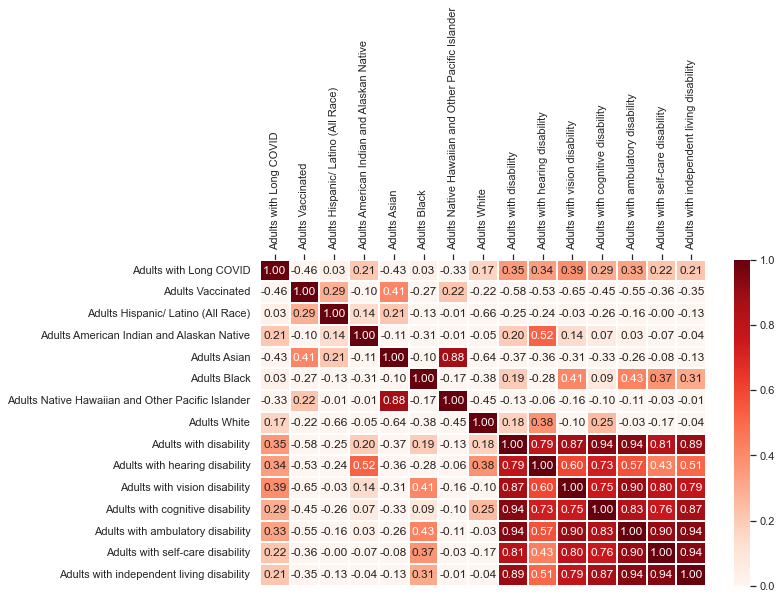

In [88]:
# Check the coorelation coefficient of feature in the df 
corrM = long_covid.corr()
  
# Create a heatmap for all parameter correlation values
sns.set(style="white",font_scale=1)
plt.figure(figsize = (10,6))
ax=sns.heatmap(corrM, cmap="Reds", fmt='.2f',annot=True,\
             xticklabels=True,linewidth=2, vmin=0, vmax=1)
# Set x-axis on top and rotate for clarity
ax.xaxis.tick_top()
plt.xticks(rotation=90)

# Show the plot
plt.show()